# Notes on pymoo 
Pymoo is a python library for single and multiobjective optimization 


more documentation at

https://pymoo.org/

reference

J. Blank and K. Deb, pymoo: Multi-Objective Optimization in Python, in IEEE Access, vol. 8, pp. 89497-89509, 2020, doi: 10.1109/ACCESS.2020.2990567
https://ieeexplore.ieee.org/document/9078759

In [ ]:
import pymoo



## Intro to Optimization

<center>
<img src="OptimProb.png" width="400"/>
</center>

``` 
where x<sub>i</sub> represents the i<sub>-th</sub> variable to be optimized, x<sup>L</sup><sub>i</sub> 
 and x<sup>U</sup><sub>i</sub> its lower and upper bound, f<sub>m</sub> the m-th objective function, gj the j<sub>-th</sub> inequality constraint and hk the k-th equality constraint.

The objective function(s) <bold>f</bold>
 are supposed to be minimized by satisfying all equality and inequality constraints. If a specific objective function is maximized (max<bold>f</bold><sub>i</sub>
), one can redefine the problem to minimize its negative value (min−<bold>f</bold><sub>i</sub>
).

```
- Multi-modality. the nature of the fitness landscape is less obvious bet yet essential to be aware of. In the case of multi-modal fitness landscapes, optimization becomes inevitably more difficult due to the existence of a few or even many local optima. For the solution found, one must always ask if the method has explored enough regions in the search space to maximize the probability of obtaining the global optimum. A multi-modal search space quickly shows the limitation of local search, which can easily get stuck.

- Differentiability. A function being differentiable implies the first or even second-order derivative can be calculated. Differentiable functions allow gradient-based optimization methods to be used, which can be a great advantage over gradient-free methods. The gradient provides a good indication of what direction shall be used for the search. Most gradient-based algorithms are point-by-point based and can be highly efficient for rather unimodal fitness landscapes. However, in practice, often functions are non-differentiable, or a more complicated function requires a global instead of a local search. The research field addressing problems without knowing their mathematical optimization is also known as black-box optimization.

- Evaluation Time. Many optimization problems in practice consist of complicated and lengthy mathematical equations or domain-specific software to be evaluated. The usage of third-party software often results in a computationally expensive and time-consuming function for evaluating objectives or constraints. For those types of problems, the algorithm’s overhead for determining the next solutions to be evaluated is often neglectable. A commercial software performing an evaluation often comes with various more practical issues such as distributed computing, several instances to be used in parallel and software license, and the software’s possible failure for specific design variable combinations.

- Uncertainty. Often it is assumed that the objective and constraint functions are of a deterministic manner. However, if one or multiple target functions are nondeterministic, this introduces noise or also referred to as uncertainty. One technique to address the underlying randomness is to repeat the evaluation for different random seeds and average the resulting values. Moreover, the standard deviation derived from multiple evaluations can be utilized to determine the performance and the reliability of a specific solution. In general, optimization problems with underlying uncertainty are investigated by the research field called stochastic optimization.


In [13]:
import numpy as np
import pandas as pd
import pickle

## Let's start with a simple and standard optimisation problem
---------

<div>
<center><img src="attachment:ae0a5bba-cf8f-44b5-9a08-0cd8dfe4a75b.png" width="200"/></center>
</div>

```
Minimize : (x-3)^2
    where, -5 < x <5 

## Problem Definition


 3 ways of defining a problem in pymoo
 1. Vectorised Problem
 2. ElementwiseProblem
 3. Functional Problem


In [2]:
from pymoo.core.problem import (
                        Problem,           # Vectorized - since most MO algorithms work with populations, this class evaluates a set of solutons at once 
                        ElementwiseProblem # Inherits from the Problem Class, works with a single solution at a time
                               )
from pymoo.problems.functional import FunctionalProblem  # Inherits from the ElementwiseProblem class , works with functions for each objective and constraint




In [3]:
# Vectorised Problem
class DeterministicProblem_P(Problem):

    def __init__(self):
        super().__init__(n_var = 1,
                         n_obj = 1,
                         xl = -5,
                         xu = 5)

    def _evaluate(self, x, out, *args, **kwargs):
        print(f"Vectorised Problem Class Length: {len(x)}", end = "\r")
        out["F"] = (x - 3)**2 # F -> objective function
        
problem_p = DeterministicProblem_P()



# ElementwiseProblem
class DeterministicProblem_EWP(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var = 1,
                         n_obj = 1,
                         xl = -5,
                         xu = 5)

    def _evaluate(self, x, out, *args, **kwargs):
        print(f"Elementwise Problem Class Length: {len(x)}", end = "\r")
        out["F"] = (x - 3)**2
        
problem_ewp = DeterministicProblem_EWP()
 
 
        
# Functional Problem
objective_function = lambda x : (x-3)**2
problem_fp = FunctionalProblem(n_var = 1,
                            objs = objective_function,
                            xl = -5,
                            xu = 5 )


problems_list = [problem_p , problem_ewp , problem_fp]

## Algoritihms

In [5]:
from pymoo.algorithms.soo.nonconvex.de import DE # Differential Evolution
from pymoo.algorithms.soo.nonconvex.ga import GA # Genetic Algorithm
from pymoo.algorithms.soo.nonconvex.nelder import NelderMead
from pymoo.optimize import minimize

#soo -> Single Objective Optimization

In [6]:
de_algo  = DE(pop_size = 50)
ga_algo  = GA(pop_size = 50) # has functionality to add mutation, crossover, sampling, selection, survival 
nm_algo  = NelderMead(init_simplex_scale=0.1)

algorithms_list = [de_algo , ga_algo , nm_algo]

In [9]:
import time
for prob in problems_list:
    for algo in algorithms_list:
        print(f"******** {type(prob).__name__} with {type(algo).__name__} Algorithm ********")
        start_time = time.time()
        res = minimize(problem = prob,
                   algorithm = algo,
                   seed=1,
                   verbose=False)
        end_time = time.time()
        
        print("\n")
        print("Solution: \nX = %s\nF = %s" % (res.X, res.F))
        print(f"Time Taken: {end_time - start_time} \n")

******** DeterministicProblem_P with DE Algorithm ********
Vectorised Problem Class Length: 50

Solution: 
X = [3.]
F = [2.52270026e-25]
Time Taken: 0.20181632041931152 

******** DeterministicProblem_P with GA Algorithm ********
Vectorised Problem Class Length: 50

Solution: 
X = [3.00024187]
F = [5.85023765e-08]
Time Taken: 0.3320953845977783 

******** DeterministicProblem_P with NelderMead Algorithm ********
Vectorised Problem Class Length: 10

Solution: 
X = [3.00015844]
F = [2.51043889e-08]
Time Taken: 0.0054225921630859375 

******** DeterministicProblem_EWP with DE Algorithm ********
Elementwise Problem Class Length: 1

Solution: 
X = [3.]
F = [2.52270026e-25]
Time Taken: 0.2795276641845703 

******** DeterministicProblem_EWP with GA Algorithm ********
Elementwise Problem Class Length: 1

Solution: 
X = [3.00024187]
F = [5.85023765e-08]
Time Taken: 0.5001757144927979 

******** DeterministicProblem_EWP with NelderMead Algorithm ********
Elementwise Problem Class Length: 1

Solu

---

Adding complexity
- Multi-objective optimization
    - Minimize and maximize multiple objectives
    
    
- Constrained optimization
    - Inequality

- The BNH problem is a bi-objective optimization problem defined as follows:
    
<center>
<img src ="The-BNH-and-Korn-problem.png ", width = 500,>
</center>

Objective Function 1: 4*(x1**2) + 4*(x2**2) # Objective Function 1 to be minimised

Objective Function 2: (x1 - 5)**2 + (x2 - 5)**2 # Objective Function 2 to be minimised

Constraints:

const1 = (x1 - 5)**2 + x2**2 - 25    # -25 to arrange for the above alignment

const2 = 7.7 -(x1 - 8)**2 -(x2 + 3)**2 # Rearrangement

In [11]:
# Using the vectorised problem class approach
class BNH(Problem):

    def __init__(self):
        super().__init__(n_var = 2,
                         n_obj = 2,
                         n_ieq_constr = 2, 
                         xl = np.array([0 , 0]),
                         xu = np.array([5 , 3]))

    def _evaluate(self, x, out, *args, **kwargs):
        
        # Objective functions
        obj1 = 4*(x[:,0]**2) + 4*(x[:,1]**2) # Objective Function 1 to be minimised
        obj2 = (x[:,0] - 5)**2 + (x[:,1] - 5)**2 # Objective Function 2 to be minimised
        
        # Constraints, default orientation of constraints being met is < 0
        const1 = (x[:,0] - 5)**2 + x[:,1]**2 - 25    # -25 to arrange for the above alignment
        const2 = 7.7 -(x[:,0] - 8)**2 -(x[:,1] + 3)**2 # Rearrangement

        # Stacking Objectives to "F" and Constraints to "G"
        out["F"] = np.column_stack([obj1 , obj2])
        out["G"] = np.column_stack([const1 , const2])

In [14]:
bnh_problem = BNH()

In [30]:
# Let's visualise the problem
from pymoo.util.plotting import plot

n_points = 50

x1 = np.linspace(0, 5, n_points)
x2 = np.linspace(0, 3, n_points)

X = np.column_stack([x1, x2])
# print(type(bnh_problem.evaluate(X, return_values_of=["F", "G"])))

#for values of F
bnh_problem.evaluate(X, return_values_of=["F", "G"])[0]

# to fetch values of G
bnh_problem.evaluate(X, return_values_of=["F", "G"])[1]
# print(bnh_problem.evaluate(X, return_values_of=["F"]))


# for F1 and F2 for multple values of x1 and x2 in a  multiple linear space


array([[  0.        , -65.3       ],
       [ -1.0062474 , -64.04885464],
       [ -1.98417326, -62.82603082],
       [ -2.93377759, -61.63152853],
       [ -3.85506039, -60.46534777],
       [ -4.74802166, -59.32748855],
       [ -5.61266139, -58.21795085],
       [ -6.44897959, -57.13673469],
       [ -7.25697626, -56.08384007],
       [ -8.0366514 , -55.05926697],
       [ -8.788005  , -54.06301541],
       [ -9.51103707, -53.09508538],
       [-10.20574761, -52.15547688],
       [-10.87213661, -51.24418992],
       [-11.51020408, -50.36122449],
       [-12.11995002, -49.50658059],
       [-12.70137443, -48.68025823],
       [-13.2544773 , -47.88225739],
       [-13.77925864, -47.11257809],
       [-14.27571845, -46.37122032],
       [-14.74385673, -45.65818409],
       [-15.18367347, -44.97346939],
       [-15.59516868, -44.31707622],
       [-15.97834236, -43.68900458],
       [-16.3331945 , -43.08925448],
       [-16.65972511, -42.51782591],
       [-16.95793419, -41.97471887],
 

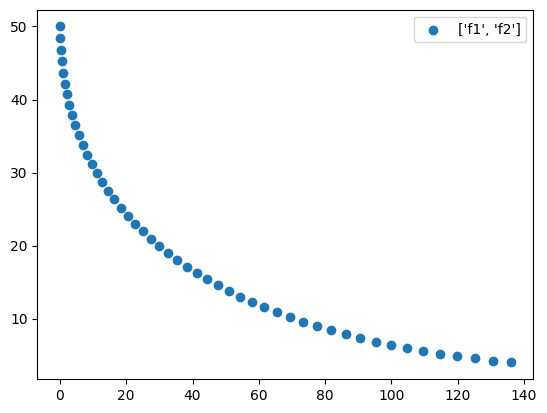

In [35]:
plot(bnh_problem.evaluate(X, return_values_of=["F"]), labels=[["f1", "f2"]], ) 

To solve with contraints


In [36]:
from pymoo.algorithms.moo.nsga2 import NSGA2
algorithm = NSGA2(pop_size = 200)

In [39]:
res = minimize(problem = bnh_problem,
               algorithm = algorithm,
               seed=1,
               verbose=False)

In [42]:
# print("Solution: \nX = %s\nF = %s" % (res.X, res.F)) 
print(res.X), 
print(res.F)

[[4.99999998e+00 2.99999999e+00]
 [1.42087105e-08 3.08738598e-07]
 [3.23057454e+00 2.83785589e+00]
 [2.77154083e+00 2.85780775e+00]
 [2.74152562e+00 2.99505618e+00]
 [3.44885315e+00 2.99475549e+00]
 [2.21676011e+00 2.41198101e+00]
 [9.25546093e-01 6.51991603e-01]
 [4.55337917e+00 2.99990840e+00]
 [2.99675822e+00 2.99976920e+00]
 [4.74393481e+00 2.99999659e+00]
 [1.83032946e+00 1.54377632e+00]
 [2.29244069e+00 2.40185835e+00]
 [6.25517710e-01 4.75030751e-01]
 [1.38988028e+00 1.51769366e+00]
 [4.78841180e+00 2.99962242e+00]
 [3.15629313e+00 2.99925177e+00]
 [1.01279472e+00 8.54922245e-01]
 [7.69215382e-01 7.53216595e-01]
 [3.40432828e+00 2.99978599e+00]
 [1.28693716e+00 1.56563299e+00]
 [1.66291028e+00 1.78397946e+00]
 [4.30095802e-01 4.38316702e-01]
 [1.62751836e+00 2.02998040e+00]
 [4.21121914e+00 2.99996689e+00]
 [1.82933107e+00 1.88959346e+00]
 [6.73788033e-01 6.64859273e-01]
 [2.14889649e+00 1.92839469e+00]
 [4.50172348e+00 2.99877625e+00]
 [7.12970001e-01 4.45464177e-01]
 [3.211256

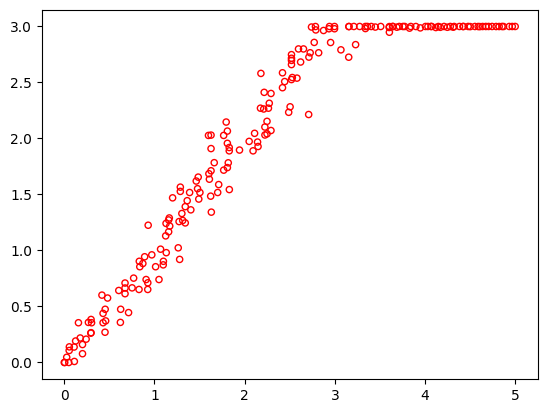

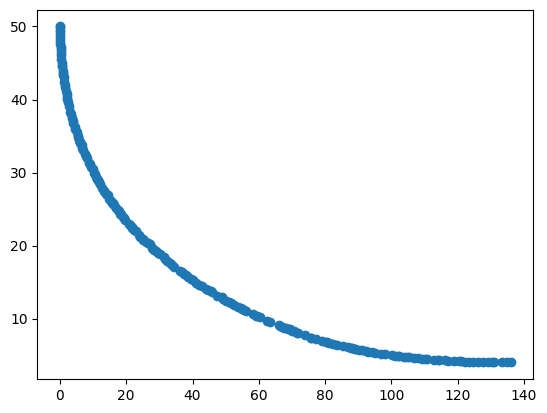

In [38]:
plot(res.X, no_fill = True);
plot(res.F, );

- Part I: A Constrained Bi-objective Optimization Problem¶

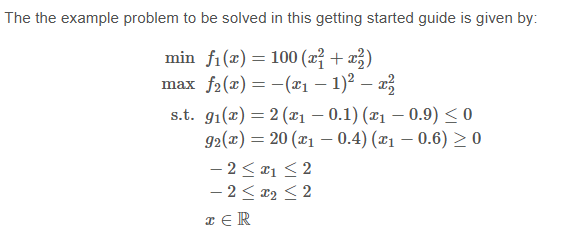

The problem consists of two objectives (M=2) where f1(x) is minimized and f2(x) maximized. The optimization is subject to two inequality constraints (J=2) where g1(x) is formulated as a less than and g2(x) as a greater than constraint. The problem is defined with respect to two variables (N=2), x1 and x2, both in the range [−2,2]. The problem does not contain any equality constraints (K=0).




The first objective f1 is minimized at (0,0), whereas the second object f2 at (1,0). Because both functions are of quadratic nature, the optimum is given by a straight line between the two optima.

In [8]:
import numpy as np
# Define the search space
X1, X2 = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))

# Define the objective functions
F1 = 100 * (X1**2 + X2**2)
F2 = (X1-1)**2 + X2**2

# Define the constraints
G1 = 2 * (X1[0] - 0.1) * (X1[0] - 0.9)
G2 = 20 * (X1[0] - 0.4) * (X1[0] - 0.6)

print(f'F1: {F1.shape}, F2: {F2.shape}, G1: {G1.shape}, G2: {G2.shape}')
print(X1[1], X2[1])

F1: (500, 500), F2: (500, 500), G1: (500,), G2: (500,)
[-2.         -1.99198397 -1.98396794 -1.9759519  -1.96793587 -1.95991984
 -1.95190381 -1.94388778 -1.93587174 -1.92785571 -1.91983968 -1.91182365
 -1.90380762 -1.89579158 -1.88777555 -1.87975952 -1.87174349 -1.86372745
 -1.85571142 -1.84769539 -1.83967936 -1.83166333 -1.82364729 -1.81563126
 -1.80761523 -1.7995992  -1.79158317 -1.78356713 -1.7755511  -1.76753507
 -1.75951904 -1.75150301 -1.74348697 -1.73547094 -1.72745491 -1.71943888
 -1.71142285 -1.70340681 -1.69539078 -1.68737475 -1.67935872 -1.67134269
 -1.66332665 -1.65531062 -1.64729459 -1.63927856 -1.63126253 -1.62324649
 -1.61523046 -1.60721443 -1.5991984  -1.59118236 -1.58316633 -1.5751503
 -1.56713427 -1.55911824 -1.5511022  -1.54308617 -1.53507014 -1.52705411
 -1.51903808 -1.51102204 -1.50300601 -1.49498998 -1.48697395 -1.47895792
 -1.47094188 -1.46292585 -1.45490982 -1.44689379 -1.43887776 -1.43086172
 -1.42284569 -1.41482966 -1.40681363 -1.3987976  -1.39078156 -1.382765

C:\Users\derne\AppData\Local\Temp\ipykernel_53112\4156898278.py:8: UserWarning: The following kwargs were not used by contour: 'label'
  CS1 = plt.contour( X1, X2, F1, 10 * levels, colors='black', alpha=0.5, label="$f_1(x)$")
C:\Users\derne\AppData\Local\Temp\ipykernel_53112\4156898278.py:11: UserWarning: The following kwargs were not used by contour: 'label'
  CS2 = plt.contour(X1, X2, F2, levels, linestyles="dashed", colors='black', alpha=0.5, label="$f_2(x)$")


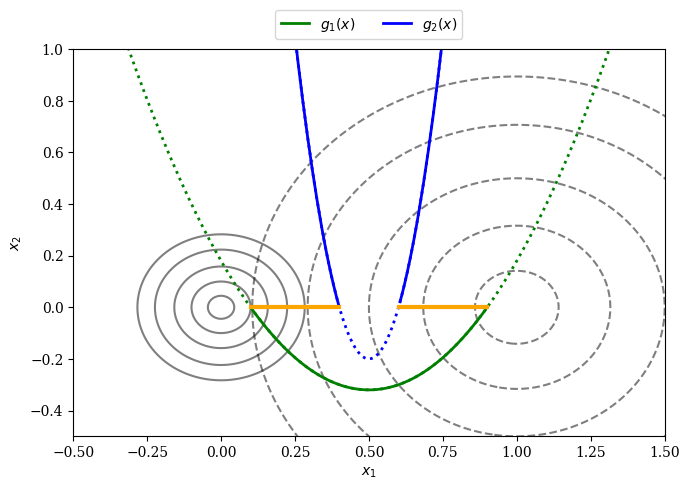

In [10]:
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
# Define the contour levels
levels = np.array([0.02, 0.1, 0.25, 0.5, 0.8])

plt.figure(figsize=(7, 5))
# Plot the contours of the objective functions: F1
CS1 = plt.contour( X1, X2, F1, 10 * levels, colors='black', alpha=0.5, label="$f_1(x)$")

# plot the contours of the objective functions: for the second objective 2
CS2 = plt.contour(X1, X2, F2, levels, linestyles="dashed", colors='black', alpha=0.5, label="$f_2(x)$")


# Plot the objective functions
plt.plot(X1[0], G1, linewidth=2.0, color="green", linestyle='dotted')
plt.plot(X1[0][G1<0], G1[G1<0], label="$g_1(x)$", linewidth=2.0, color="green")

plt.plot(X1[0], G2, linewidth=2.0, color="blue", linestyle='dotted')
plt.plot(X1[0][X1[0]>0.6], G2[X1[0]>0.6], label="$g_2(x)$",linewidth=2.0, color="blue")
plt.plot(X1[0][X1[0]<0.4], G2[X1[0]<0.4], linewidth=2.0, color="blue")

plt.plot(np.linspace(0.1,0.4,100), np.zeros(100),linewidth=3.0, color="orange")
plt.plot(np.linspace(0.6,0.9,100), np.zeros(100),linewidth=3.0, color="orange")

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=4, fancybox=True, shadow=False)

plt.tight_layout()
plt.show()

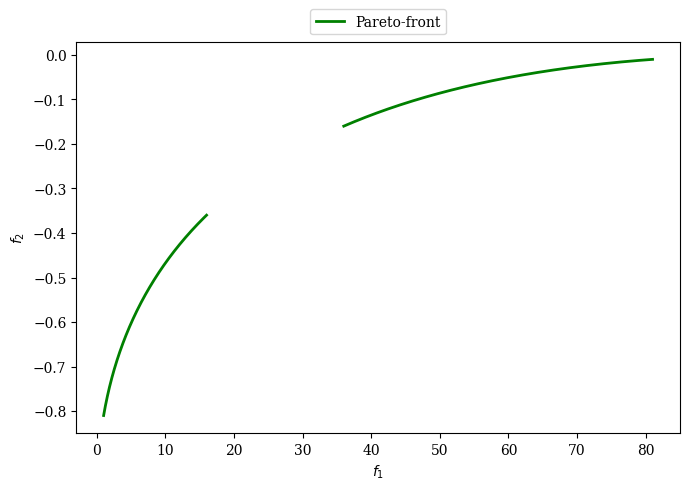

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

f2 = lambda f1: - ((f1/100) ** 0.5 - 1)**2
F1_a, F1_b = np.linspace(1, 16, 300), np.linspace(36, 81, 300)
F2_a, F2_b = f2(F1_a), f2(F1_b)

plt.rc('font', family='serif')
plt.plot(F1_a,F2_a, linewidth=2.0, color="green", label="Pareto-front")
plt.plot(F1_b,F2_b, linewidth=2.0, color="green")

plt.xlabel("$f_1$")
plt.ylabel("$f_2$")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=4, fancybox=True, shadow=False)

plt.tight_layout()
plt.show()

### Find a Solution Set using Multi-objective Optimization

-----
In pymoo, each objective function is supposed to be minimized, and each constraint needs to be provided in the form of ≤0
.commit to either minimize or maximize all objectives and to have only ≤
 or ≥
 constraints.

Thus, we need to multiple an objective that is supposed to be maximized by −1
 and minimize it. This results in minimizing −f2(x)
 instead of maximizing f2(x)
.


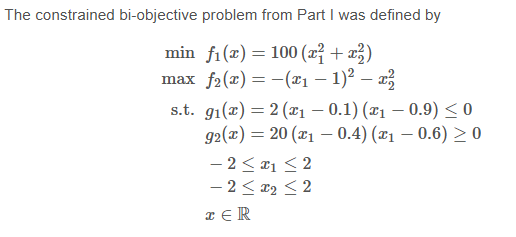

This results in minimizing −f2(x)
 instead of maximizing f2(x)
.

Moreover, the inequality constraints need to be formulated as less than zero (≤0) constraint. For this reason, g2(x)
 is multiplied by −1 in order to flip inequality relation. 
 . Also, we recommend the normalization of constraints to make them operating on the same scale and giving them equal importance.

For g1(x)
, the coefficient results in 2⋅(−0.1)⋅(−0.9)=0.18
 and for g2(x)
 in 20⋅(−0.4)⋅(−0.6)=4.8
, respectively. We achieve normalization of constraints by dividing g1(x)
 and g2(x)
 by its corresponding coefficient.


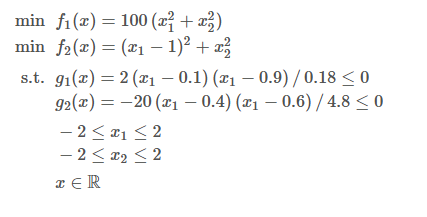


In [11]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_ieq_constr=2,
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0]**2 + x[1]**2)
        f2 = (x[0]-1)**2 + x[1]**2

        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8

        out["F"] = [f1, f2]
        out["G"] = [g1, g2]


problem = MyProblem()

Most common ways of defining the termination is by limiting the overall number of function evaluations or simply the number of iterations of the algorithm. Moreover, some algorithms already have implemented their own, for instance Nelder-Mead when the simplex becomes degenerated or CMA-ES where a vendor library is used

In [12]:
# Initialize an Algorithm

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling

algorithm = NSGA2(
    pop_size=40, # number of individuals in each generation
    n_offsprings=10, # number of offsprings created in each generation, that is, the number of children
    sampling=FloatRandomSampling(), # how to sample new individuals; here: randomly
    crossover=SBX(prob=0.9, eta=15),# crossover operator, with probability 0.9,: that two parents produce one offspring
    mutation=PM(eta=20), #  mutation operator, that one parent produces one offspring
    eliminate_duplicates=True
)




In [13]:
# Define a Termination Criterion

from pymoo.termination import get_termination

termination = get_termination("n_gen", 40)



In [14]:
# Optimize the Problem
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed=1,# random seed: for reproducibility
               save_history=True,
               verbose=True)

X = res.X
F = res.F

# the minimum constraint violation (cv (min)) and 
# the average constraint violation (cv (avg)) in the current population


n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       40 |      1 |  0.000000E+00 |  2.363992E+01 |             - |             -
     2 |       50 |      1 |  0.000000E+00 |  1.239636E+01 |  0.000000E+00 |             f
     3 |       60 |      2 |  0.000000E+00 |  5.4620972973 |  1.0000000000 |         ideal
     4 |       70 |      2 |  0.000000E+00 |  2.3938570636 |  0.000000E+00 |             f
     5 |       80 |      2 |  0.000000E+00 |  1.1200787779 |  0.000000E+00 |             f
     6 |       90 |      3 |  0.000000E+00 |  0.1858089725 |  0.1785481247 |             f
     7 |      100 |      4 |  0.000000E+00 |  0.0096392745 |  0.0639961700 |         ideal
     8 |      110 |      6 |  0.000000E+00 |  0.0016302512 |  0.0912676400 |         ideal
     9 |      120 |      7 |  0.000000E+00 |  0.000000E+00 |  0.0246228920 |             f
    10 |      130 |      6 |  0.000000E+00 |  0.000000E+00 |  0.1055074321 |         ideal

 Here, we execute NSGA2 on a problem where pymoo has no knowledge about the optimum. Each line represents one iteration. The first two columns are the current generation counter and the number of evaluations so far. For constrained problems, the next two columns show the<em  > minimum constraint violation (cv (min)) and the average constraint violation (cv (avg)) </em>in the current population. This is followed by the number of non-dominated solutions (n_nds) and two more metrics which represents the movement in the objective space.

# Visualize the Results

visualizing the solutions to get a grasp of commonalities or if the Pareto-front is known to even check the convergence.

[-2. -2.] [2. 2.]


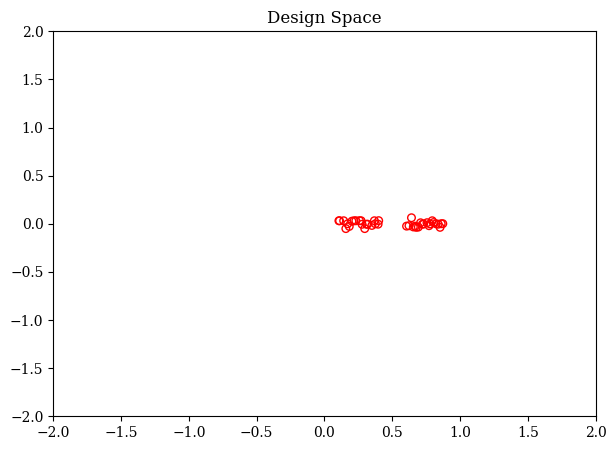

In [17]:
import matplotlib.pyplot as plt

xl, xu = problem.bounds() # get the bounds of the problem, which are [-2, -2] and [2, 2] in this case. to plot the res.X and res.F

print(f' x in [{xl}, {xu}]') 

plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1], xu[1])
plt.title("Design Space")
plt.show()

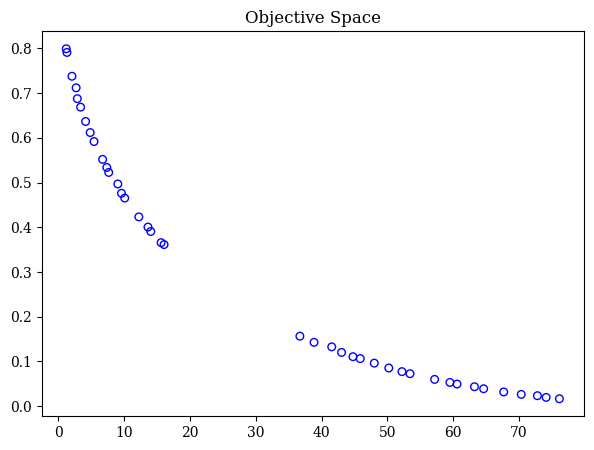

In [18]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()